In [1]:
import glob
import skimage
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('default')

In [133]:
# Add Cascade?

class Pic:
    
    C_MAP = None
    
    def __init__(self, local_file):
        self.data = skimage.io.imread(local_file)
        self.original_copy = self.data
        self.height = self.data.shape[0]
        self.width = self.data.shape[1]
        
    def get_data(self):
        return self.data
    
    @classmethod
    def get_cmap(cls):
        return cls.C_MAP 
    
    def reset(self):
        self.data = self.original_copy
        return self
        
    def show_pic(self, contours = None, blobs = None):
        dpi = 200
        plt.figure(dpi = dpi)
        plt.grid(False)
        plt.imshow(self.data, cmap = self.get_cmap())
        if contours is not None:
            for contour in contours:
                plt.plot(contour[:, 1], contour[:, 0], linewidth = 1)
        ax = plt.gca()
        if blobs is not None:
            for blob in blobs:
                y, x, area = blob
                ax.add_patch(plt.Circle((x, y), area, color = 'r', fill = False, linewidth = 1))
        ax.axes.xaxis.set_visible(False)
        ax.axes.yaxis.set_visible(False)
        plt.show()
        
    def show_hist(self):
        dpi = 200
        plt.figure(dpi = dpi)
        plt.hist(self.data.ravel(), 
                 bins = 256, 
                 histtype = 'stepfilled', 
                 color = 'darkblue',
                 edgecolor = 'black',
                 density = True)
        plt.title('Pixel Intensity Histogram')
        plt.xlim(0,1)
        plt.show()
        
    def equalize_contrast(self):
        self.data = skimage.exposure.equalize_hist(self.data)
        return self
        
    def clahe(self, clip_limit = 0.03):
        self.data = skimage.exposure.equalize_adapthist(self.data, clip_limit = clip_limit)
        return self
    
    def resize(self, scale = 2):
        height = self.height/2
        width = self.width/2
        self.data = (
            skimage.transform.resize(self.data, output_shape = (height, width), anti_aliasing = True)
        )
        return self
        
class ColorPic(Pic):
    
    def __init__(self, local_file):
        super().__init__(local_file)
        
    def show_rgb_hist(self):
        dpi = 200
        plt.figure(dpi = dpi)
        plt.hist(self.data[:,:,0].ravel(), bins = 256, color = 'red', alpha = 0.5, density = True)
        plt.hist(self.data[:,:,1].ravel(), bins = 256, color = 'green', alpha = 0.5, density = True)
        plt.hist(self.data[:,:,2].ravel(), bins = 256, color = 'blue', alpha = 0.5, density = True)
        plt.xlim(0,256)
        plt.title('Density of RGB Values in Picture')
        plt.show()
        
    def slic(self, n_segments = 500):
        segments = skimage.segmentation.slic(self.data, 
                                             n_segments = n_segments, 
                                             compactness = 1,
                                             sigma = 1)
        self.data = skimage.color.label2rgb(segments, self.data, kind = 'avg')
        return self
        
class GrayPic(Pic):
    
    C_MAP = 'gray'
    def __init__(self, local_file):
        super().__init__(local_file)
        self.data = skimage.color.rgb2gray(self.data)
        self.original_copy = self.data
        self.global_thresh = skimage.filters.threshold_otsu(self.data)
        
    def thresh(self):
        self.data = self.data > self.global_thresh
        return self
        
    def inverse_thresh(self):
        self.data = self.data <= self.global_thresh
        return self
    
    def edges(self, sigma = 0.5):
        self.data = skimage.feature.canny(self.data, sigma = sigma)
        return self
    
    def erode(self):
        self.data = skimage.morphology.binary_erosion(self.data)
        return self
    
    def dilate(self):
        self.data = skimage.morphology.binary_dilation(self.data)
        return self
    
    def close(self):
        self.data = skimage.morphology.binary_closing(self.data, np.ones((1,1)))
        return self
    
    def show_contours(self):
        contours = skimage.measure.find_contours(self.thresh().data)
        return self.show_pic(contours = contours)
      
    def show_blobs(self):
        blobs = skimage.feature.blob_doh(self.thresh().close().data)
        return self.show_pic(blobs = blobs)

In [134]:
pic = GrayPic(glob.glob('data/original_pictures/*.jpg')[24])

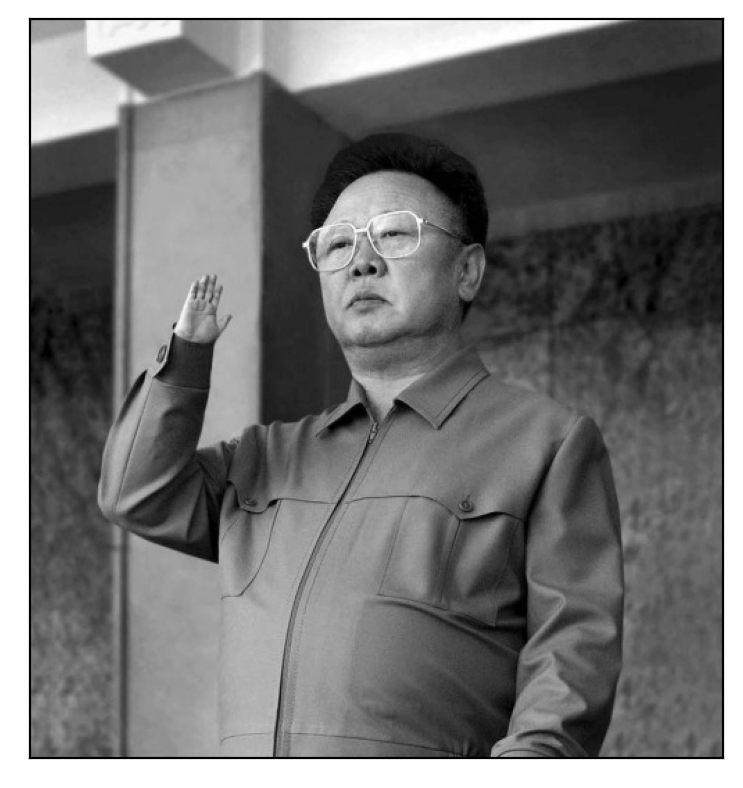

In [135]:
pic.show_pic()